In [2]:
# Lo primero que hacemos es importar todas las librerias necesarias.
#importamos librerias para tratamiento de datos
import numpy as np
import pandas as pd
pd.options.display.float_format = '{:,}'.format
import re
import math as mat

#importamos librerias la visualizacion de datos
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline

In [3]:
# Abrimos el dataset y hacemos un chequeo rápido para saber cantidad de registros y miramos la composición del mismo.
filename = "../../dataset/properati.csv"
data = pd.read_csv(filename)

display(data.sample(n=6))
print(f"(Cantidad de Filas, Cantidad de columnas) -> {data.shape}")

,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,...,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
73923,73923,sell,store,Vicente López,|Argentina|Bs.As. G.B.A. Zona Norte|Vicente Ló...,Argentina,Bs.As. G.B.A. Zona Norte,nan,NaN,nan,...,200.0,"5,970.1492537313425","10,000.0",nan,nan,nan,http://www.properati.com.ar/1aoax_venta_local_...,"Local comercial, con 8 m de vidrieras sobre la...",Local en Vicente Lopez,https://thumbs4.properati.com/6/6Bq-NJJj7NqaK-...
5007,5007,sell,apartment,Villa Luro,|Argentina|Capital Federal|Villa Luro|,Argentina,Capital Federal,"3,427,407.0","-34.6297753,-58.5043208",-34.6297753,...,nan,nan,nan,nan,nan,nan,http://www.properati.com.ar/15ovx_venta_depart...,VENTA MONOAMBIENTE EN VILLA LURO.Unidad monoam...,Av. Lope de Vega 1000,https://thumbs4.properati.com/8/cOyEukcRL5Oeh-...
24772,24772,sell,house,Benavidez,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre|Bena...,Argentina,Bs.As. G.B.A. Zona Norte,"3,436,048.0",NaN,nan,...,143.0,442.0731707317073,"2,027.972027972028",nan,nan,nan,http://www.properati.com.ar/17p38_venta_casa_b...,Hermosa casa en el barrio San Agustin de dos p...,"Casa 656m² con 2 Plantas, Tigre, Benavidez, po...",https://thumbs4.properati.com/7/ZFbOowdqJPET3A...
86656,86656,sell,house,Luis Guillón,|Argentina|Bs.As. G.B.A. Zona Sur|Esteban Eche...,Argentina,Bs.As. G.B.A. Zona Sur,"3,430,992.0",NaN,nan,...,170.0,"1,041.1764705882354","1,041.1764705882354",nan,nan,nan,http://www.properati.com.ar/1b4qv_venta_casa_l...,Hermoso chalet de 170m2 aprox cubiertos.Consta...,Casa en Luis Guillon,https://thumbs4.properati.com/5/nPRSyUYJe6o8Dy...
66480,66480,sell,house,San Carlos de Bariloche,|Argentina|Río Negro|San Carlos de Bariloche|S...,Argentina,Río Negro,"3,837,856.0",NaN,nan,...,130.0,nan,nan,nan,nan,nan,http://www.properati.com.ar/1adv6_venta_casa_s...,Muy buena vista al lago.Calefaccion por calefa...,Casa - Golf,https://thumbs4.properati.com/1/qe9wAerDolOGTx...
34149,34149,sell,house,Haedo,|Argentina|Bs.As. G.B.A. Zona Oeste|Morón|Haedo|,Argentina,Bs.As. G.B.A. Zona Oeste,nan,NaN,nan,...,50.0,566.6666666666666,"3,400.0",nan,3.0,nan,http://www.properati.com.ar/18bby_venta_casa_h...,Valor de lote. - Publicado a traves de VisualG...,Casa en Venta Haedo / Moron (B110 10),NaN


(Cantidad de Filas, Cantidad de columnas) -> (121220, 26)


In [4]:
# Columna price_usd_per_m2 : revisamos que opciones tiene, o si se repite lo mismo.
print(f'Cantidad de registros con NaN: {data.price_usd_per_m2.isnull().sum()}')
print(f'Porcentaje de registros con NaN: {data.price_usd_per_m2.isnull().mean()*100}')
print("Contamos cantidad de registros unicos:")
print(data.groupby(['price_usd_per_m2']).size().reset_index(name='count'))

Cantidad de registros con NaN: 52603
Porcentaje de registros con NaN: 43.394654347467416
Contamos cantidad de registros unicos:
         price_usd_per_m2  count
0                     0.6      1
1                     1.0      1
2      1.1845710280373831      1
3      1.2369857009345795      1
4      1.5734420828905418      1
...                   ...    ...
25562  78,533.33333333331      1
25563            80,000.0      1
25564 104,486.11428571428      1
25565 173,826.06666666668      1
25566 206,333.33333333328      1

[25567 rows x 2 columns]


<AxesSubplot:xlabel='state_name'>

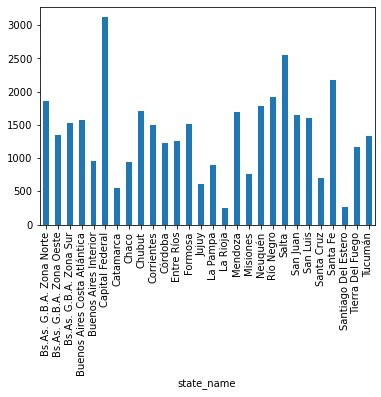

In [5]:
#graficamos el dato por Estado con el fin de observar los rangos de precios en dolares por metro cuadrado
#En esta grafica podemos observar la variación en la media de las areas que existen de acuerdo al Estado.
data.groupby('state_name')['price_usd_per_m2'].mean().plot.bar()

In [6]:
data.price_usd_per_m2.describe()

count              68,617.0
mean     2,160.086915888256
std     2,759.2886214684504
min                     0.6
25%     1,218.1818181818182
50%                 1,800.0
75%     2,486.4117647058824
max     206,333.33333333328
Name: price_usd_per_m2, dtype: float64

Detalle de análisis de columnas:
* `price_usd_per_m2` -> Esta columna tiene 52.603 datos nulos o su equivalente 43.39%. Consideramos que esta variable es relevante para la proyección, por esta razón consideramos que podriamos completarla realizando diferentes operaciones:
1. Extrayendo el dato de las columnas description y title
2. Calculando el valor al dividir el precio aprox en usd entre la superficie en m2
3. Calculando un valor promedio por metro cuadrado en cada estado para cada tipo de propiedad.

### Detalle de valores extremos en la  columna `price_usd_per_m2`:

En el catplot elaborado para esta variable comparada por tipo de propiedad podemos observar 6 datos que se alejan significativamente de la media principalmente en el tipo de propiedad apartamentos.

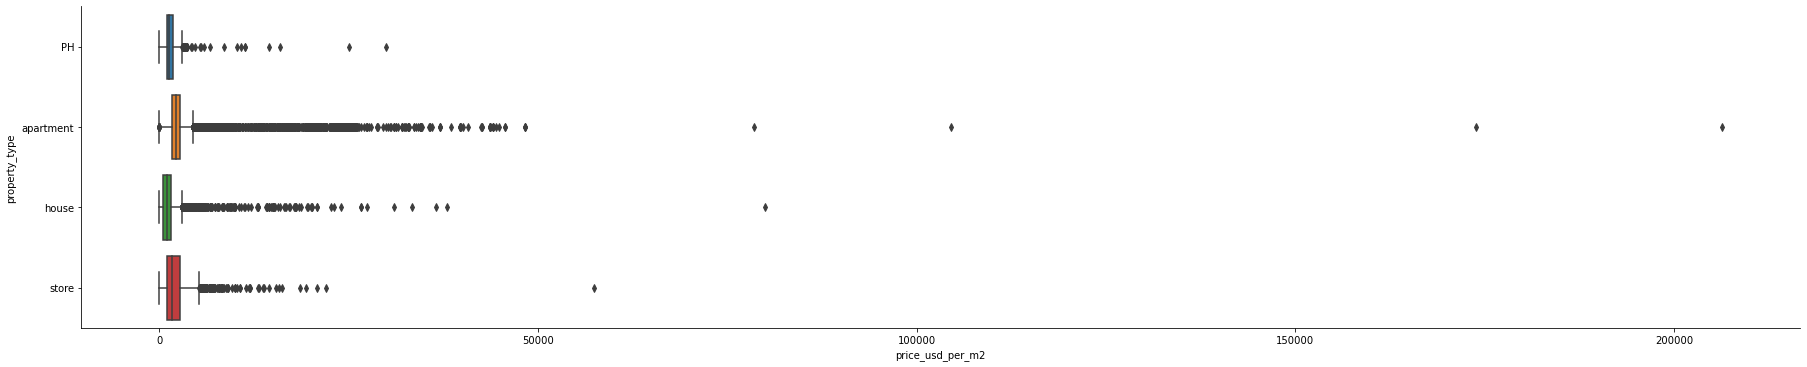

In [7]:
sns.catplot(data=data, x= 'price_usd_per_m2', y="property_type", kind="box", height=5, aspect=5,)


In [8]:
Calculo de información a partir de las columnas normalizadas de Superficie y precio aprox en dolares

SyntaxError: invalid syntax (1631594979.py, line 1)

In [ ]:
Precio_Usd_m2_calculado=

In [10]:
#Precio_Usd_m2 trayendo el valor medio por Place Name
#media_precio_usd_place_name=data[place_name] data[price_usd_per_m2]
#data[price_usd_per_m2].fillna(data[nueva variable].mean(), inplace:True)

valores_promedio_place_name=data.groupby('place_name').precio_usd_per_m2.mean()
valores_promedio_place_name.head()

AttributeError: 'DataFrameGroupBy' object has no attribute 'precio_usd_per_m2'

##Calculo de la columna Price_usd_covered_per_m2

Calculo de información a partir de las columnas normalizadas de Superficie y precio aprox en dolares